In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pyactup as pau


main_dir = os.path.dirname(os.path.realpath('../__file__'))

sns.set(font_scale=2)
sns.set_style("white")

ACT-R connection has been started.


In [2]:
model_name='markov-ibl-hybrid'
df_rt = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, 
                                      alpha=.8, beta=5,  lambda_parameter=.6, w_parameter=0, 
                                      temperature=.2, decay=.5, lf=0.15, fixed_cost=0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha': 0.8, 'beta': 5, 'lambda_parameter': 0.6, 'p_parameter': 0, 'w_parameter': 0, 'temperature': 0.2, 'decay': 0.5, 'lf': 0.15, 'fixed_cost': 0.1, 'n_sampling': 20}


In [3]:
dep_var_suffix = '_mean'
df_rt['response_time'+dep_var_suffix] = df_rt.apply(lambda x: 1000*(x['state1_response_time'+dep_var_suffix] + x['state2_response_time'+dep_var_suffix]), axis=1)

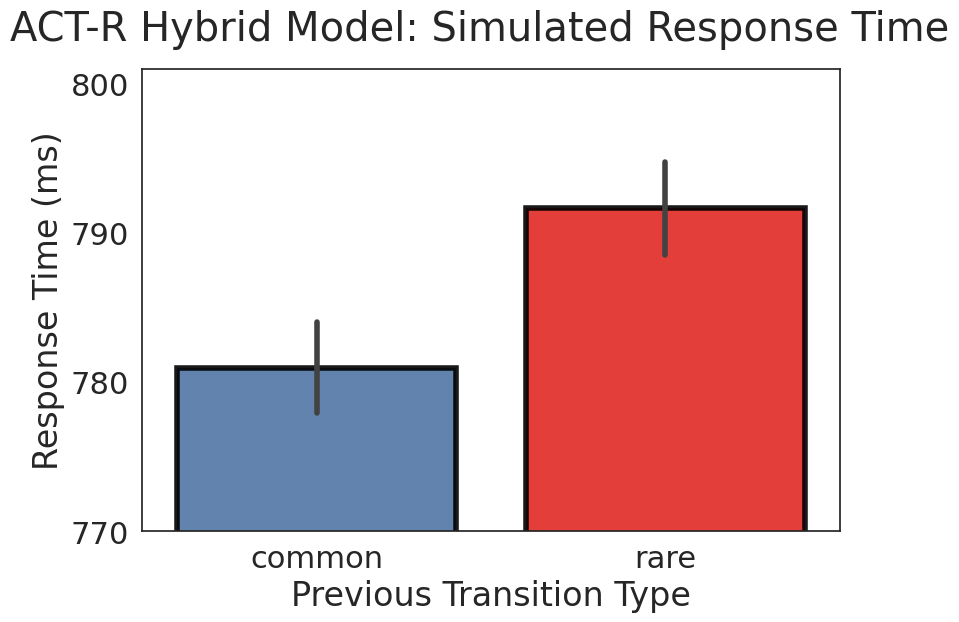

In [28]:
fig, ax = plt.subplots(figsize=(Plot.FIG_WIDTH*1.5,  Plot.FIT_HEIGHT*1.5))
fig.suptitle('%s: Simulated Response Time' % (MarkovPlot.MODEL_NAME_CODES[model_name])) 
sns.barplot(data=df_rt, x=Plot.TRANS_FACTOR, y='response_time'+dep_var_suffix, width=.8, linewidth=4, errwidth=4, edgecolor='black', alpha=.9, 
              errorbar='se', hue=Plot.TRANS_FACTOR, palette=Plot.PALETTE, dodge=False, 
              order=['common', 'rare'], hue_order=['common', 'rare'], ax=ax)

ax.set_ylim(770, 801)
ax.set_yticks(np.arange(770, 801, 10))
ax.set_yticklabels(np.arange(770, 801, 10))
ax.set_xlabel(xlabel='Previous Transition Type')
ax.set_ylabel(ylabel='Response Time (ms)')

plt.legend([],[], frameon=False)
plt.show()

## PStay Plot

In [75]:
model_name='markov-ibl-hybrid'

df_actr1 = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, 
                                      alpha=.8, beta=5,  lambda_parameter=.6, w_parameter=0, 
                                      temperature=.2, decay=.5, fixed_cost=-0.1, )
df_actr2 = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, 
                                      alpha=.8, beta=5,  lambda_parameter=.6, w_parameter=0.5, 
                                      temperature=.2, decay=.5, fixed_cost=-0.1, )
df_actr3 = MarkovSimulation.run_simulations(model=model_name, e=100, verbose=True, 
                                      alpha=.8, beta=5,  lambda_parameter=.6, w_parameter=1, 
                                      temperature=.2, decay=.5, fixed_cost=-0.1, )

  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha': 0.8, 'beta': 5, 'lambda_parameter': 0.6, 'p_parameter': 0, 'w_parameter': 0, 'temperature': 0.2, 'decay': 0.5, 'lf': 0.63, 'fixed_cost': -0.1}


  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha': 0.8, 'beta': 5, 'lambda_parameter': 0.6, 'p_parameter': 0, 'w_parameter': 0.5, 'temperature': 0.2, 'decay': 0.5, 'lf': 0.63, 'fixed_cost': -0.1}


  0%|          | 0/100 [00:00<?, ?it/s]

################## SETUP MODEL markov-ibl-hybrid ##################
{'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 'LOAD', 'REWARD': {'B1': (1, -1), 'B2': (1, -1), 'C1': (1, -1), 'C2': (1, -1)}, 'alpha': 0.8, 'beta': 5, 'lambda_parameter': 0.6, 'p_parameter': 0, 'w_parameter': 1, 'temperature': 0.2, 'decay': 0.5, 'lf': 0.63, 'fixed_cost': -0.1}


In [78]:
df_actr1['w'] = 0
df_actr2['w'] = 0.5
df_actr3['w'] = 1
df_actr = pd.concat([df_actr1,df_actr2,df_actr3], axis=0)

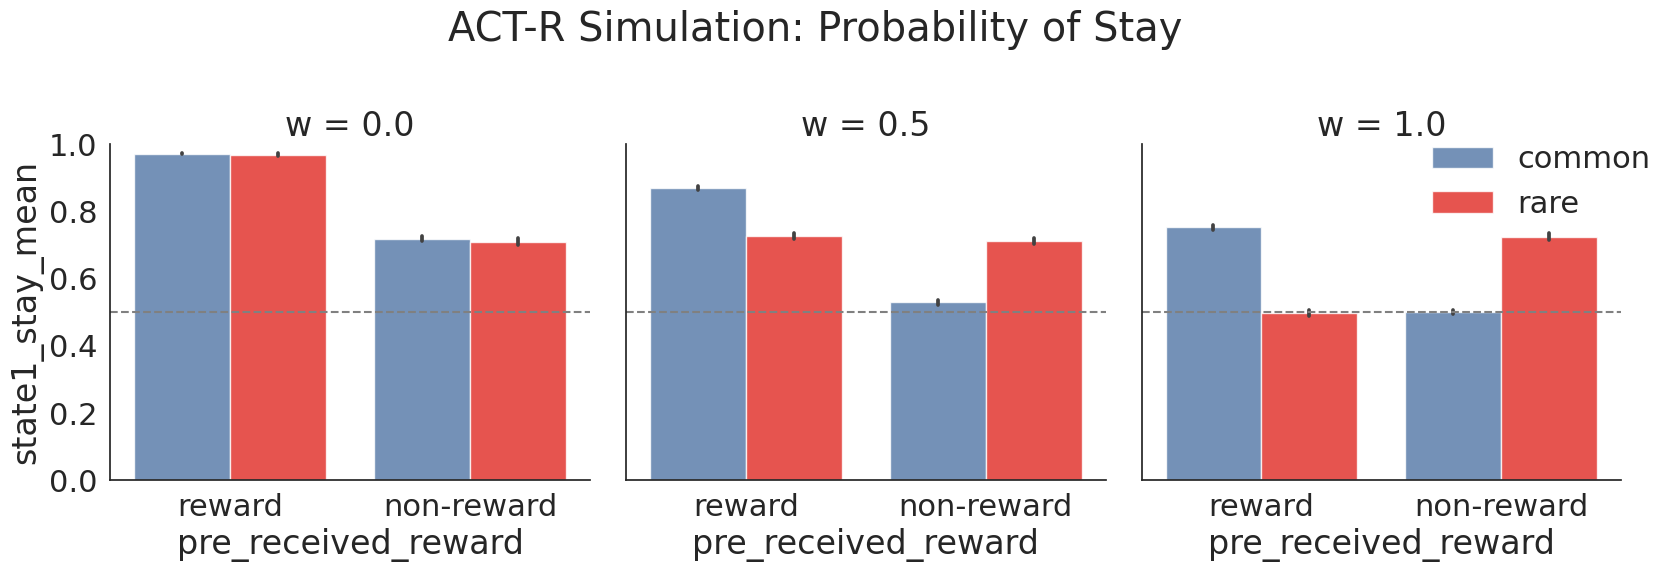

In [124]:
g = sns.FacetGrid(df_actr, col='w', ylim=(0,1), height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x=Plot.REWARD_FACTOR, y='state1_stay_mean',hue=Plot.TRANS_FACTOR, errorbar='se',palette=Plot.PALETTE, alpha=.8, 
                order=['reward', 'non-reward'], hue_order=['common', 'rare'])
g.map(plt.axhline, y=.5, ls='--', c='gray')
g.add_legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(0.85, .8), frameon=False)
g.fig.subplots_adjust(top=.9)  # adjust the Figure in rp
g.fig.suptitle('ACT-R Simulation: Probability of Stay')
g.set_titles(row_template = '{row_name}', col_template = 'w = {col_name}')
plt.tight_layout()
plt.show()

## Cannonical Pattern

In [103]:
# Your dataframes
df_rl1 = pd.DataFrame({
    'model_name':'Model-Free',
    'previous_reward': ['reward', 'reward', 'non-reward', 'non-reward'],
    'transition_frequency': ['common', 'rare', 'common', 'rare'],
    'probability_stay': [0.8, 0.8, 0.3, 0.3]
})
df_rl2 = pd.DataFrame({
    'model_name':'Model-Based',
    'previous_reward': ['reward', 'reward', 'non-reward', 'non-reward'],
    'transition_frequency': ['common', 'rare', 'common', 'rare'],
    'probability_stay': [0.8, 0.3, 0.3, 0.8]
})
df_rl3 = pd.DataFrame({
    'model_name':'Hybrid',
    'previous_reward': ['reward', 'reward', 'non-reward', 'non-reward'],
    'transition_frequency': ['common', 'rare', 'common', 'rare'],
    'probability_stay': [0.8, 0.6, 0.3, 0.5]
})
df_rl = pd.concat([df_rl1, df_rl2, df_rl3], axis=0)

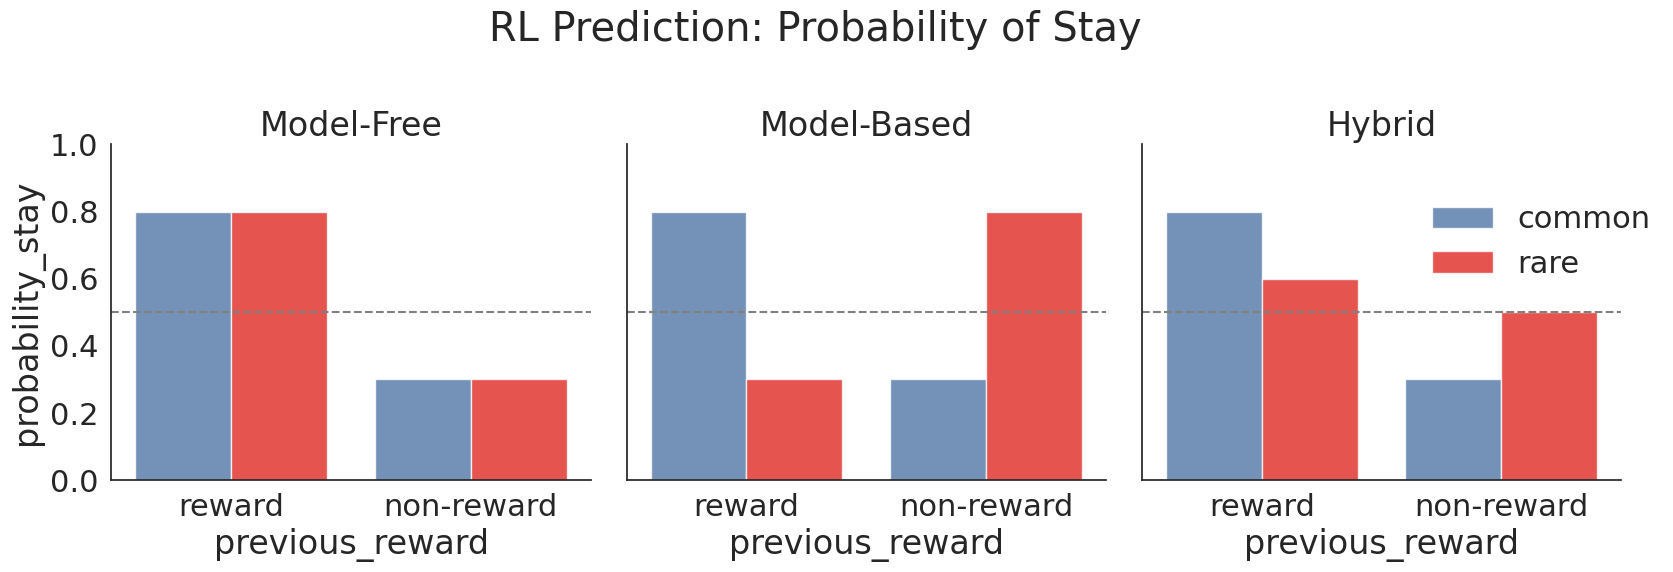

In [126]:
# g = sns.FacetGrid(df, col="w",  col_wrap=2, aspect=1.2)
g = sns.FacetGrid(df_rl, col='model_name', ylim=(0,1), height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x='previous_reward', y='probability_stay',hue='transition_frequency', errorbar='se', palette=Plot.PALETTE, alpha=.8, 
                order=['reward', 'non-reward'], hue_order=['common', 'rare'])
g.map(plt.axhline, y=.5, ls='--', c='gray')
g.add_legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(0.85, .7), frameon=False)
g.fig.subplots_adjust(top=.8)  # adjust the Figure in rp
g.fig.suptitle('RL Prediction: Probability of Stay')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.tight_layout()
plt.show()